<a href="https://colab.research.google.com/github/sushigva/Foundations-of-Data-Science-Repo/blob/main/labs/lab1/lab1-ftx-stock-pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [166]:
import pandas as pd

df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [167]:
print(data.shape)

(726, 1)


## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [168]:
import pandas as pd

# Loaded
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# Check and remove duplicates
print("Duplicate rows before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after:", df.duplicated().sum())

# Check and remove empty
print("Missing values before:", df.isnull().sum().sum())
df.dropna(inplace=True)
print("Missing values after:", df.isnull().sum().sum())
# Dropped those columns above
df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], inplace=True)

# Save the cleaned DataFrame #made cleaned file
cleaned_file_path = 'cleaned_ftx_data.csv'
df.to_csv(cleaned_file_path, index=False)

# showing the path to the cleaned file
print("Cleaned file saved to:", cleaned_file_path)


Duplicate rows before: 14
Duplicate rows after: 0
Missing values before: 0
Missing values after: 0
Cleaned file saved to: cleaned_ftx_data.csv


Now display the first 10 rows of the cleaned dataset.

In [169]:
df.head(10)


,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [170]:
import pandas as pd

# CSV file loaded
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# close diff
df['close_diff'] = df['close'].diff()


# show the first 10 rows of the cleaned dataset
df.head(10)


,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp,close_diff
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z,NaN
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z,-0.003640
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z,0.021183
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z,0.025860
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z,0.037577
5,2022-12-26T00:00:00.000Z,2022-12-26T23:59:59.999Z,2022-12-26T15:10:00.000Z,2022-12-26T00:01:00.000Z,0.894567,1.011183,0.893652,0.930696,7065306.21,3.061013e+08,2022-12-26T23:59:59.999Z,0.007028
6,2022-12-25T00:00:00.000Z,2022-12-25T23:59:59.999Z,2022-12-25T00:34:00.000Z,2022-12-25T23:50:00.000Z,0.924432,0.935517,0.894370,0.894657,2577834.83,2.942482e+08,2022-12-25T23:59:59.999Z,-0.036039
7,2022-12-24T00:00:00.000Z,2022-12-24T23:59:59.999Z,2022-12-24T05:34:00.000Z,2022-12-24T21:44:00.000Z,0.957505,0.975671,0.921085,0.924433,5055004.16,3.040414e+08,2022-12-24T23:59:59.999Z,0.029776
8,2022-12-23T00:00:00.000Z,2022-12-23T23:59:59.999Z,2022-12-23T13:19:00.000Z,2022-12-23T05:54:00.000Z,1.027133,1.038282,0.948058,0.957006,17088962.94,3.147547e+08,2022-12-23T23:59:59.999Z,0.032574
9,2022-12-22T00:00:00.000Z,2022-12-22T23:59:59.999Z,2022-12-22T19:07:00.000Z,2022-12-22T16:08:00.000Z,0.873973,1.127198,0.835625,1.027162,22418556.51,3.378284e+08,2022-12-22T23:59:59.999Z,0.070155


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [171]:
import pandas as pd

# Loaded set
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

#  daily change in closing prices
df['close_change'] = df['close'].diff()
# filter for days with positive growth
positive_growth_days = df[df['close_change'] > 0]

# got top 10 growth days
top_10_growth_days = positive_growth_days.nlargest(10, 'close_change')[['timestamp', 'close_change']]

# show top 10
print(top_10_growth_days)

                    timestamp  close_change
56   2022-11-07T23:59:59.999Z     16.623292
468  2021-09-16T23:59:59.999Z     14.497738
598  2021-05-18T23:59:59.999Z     14.017812
473  2021-09-19T23:59:59.999Z      8.315742
484  2021-09-09T23:59:59.999Z      6.929033
350  2022-01-20T23:59:59.999Z      6.770635
594  2021-05-22T23:59:59.999Z      6.228516
476  2021-09-16T23:59:59.999Z      5.807064
481  2021-09-12T23:59:59.999Z      5.201864
605  2021-05-11T23:59:59.999Z      5.154806


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [172]:
import pandas as pd

# Loaded the dataset
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# daily change in closing prices
df['close_change'] = df['close'].diff()




# rate of change (change in value / previous value) * 100
df['rate_of_change'] = (df['close_change'] / df['close'].shift(1)) * 100

# show the first few rows to chjeck
print(df.head())

                   timeOpen                 timeClose  \
0  2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1  2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2  2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3  2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4  2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1  2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2  2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000Z  0.885723  0.887118   
3  2022-12-28T00:20:00.000Z  2022-12-28T10:44:00.000Z  0.921162  0.925702   
4  2022-12-27T14:19:00.000Z  2022-12-27T19:12:00.000Z  0.931138  0.955402   

        low     close      volume     marketCap                 timestamp  \
0  0.835226  0.842688  3001502.06  2.771561e+08  2022-12-31T23:59:59.999Z   
1  0.826643  0.839048  3608615.07  2.759

## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [173]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# daily change in closing prices
df['close_change'] = df['close'].diff()
#  rate of change
df['rate_of_change'] = (df['close_change'] / df['close'].shift(1)) * 100
# top 5 days of the greatest rate changes
#  absolute values for pos/neg
top_5_rate_changes = df.reindex(df['rate_of_change'].abs().nlargest(5).index)[['timestamp', 'rate_of_change']]

# show
print(top_5_rate_changes)

                    timestamp  rate_of_change
56   2022-11-07T23:59:59.999Z      301.206424
55   2022-11-08T23:59:59.999Z      139.886865
51   2022-11-12T23:59:59.999Z       40.263963
598  2021-05-18T23:59:59.999Z       37.950200
53   2022-11-10T23:59:59.999Z       35.766981


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

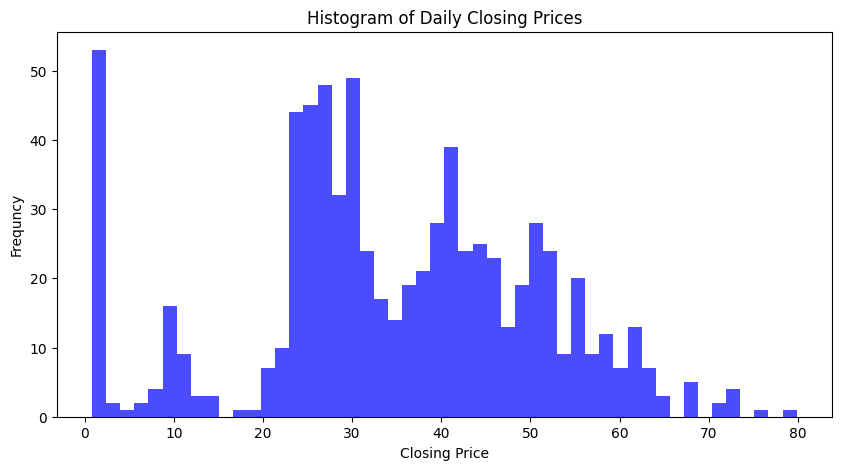

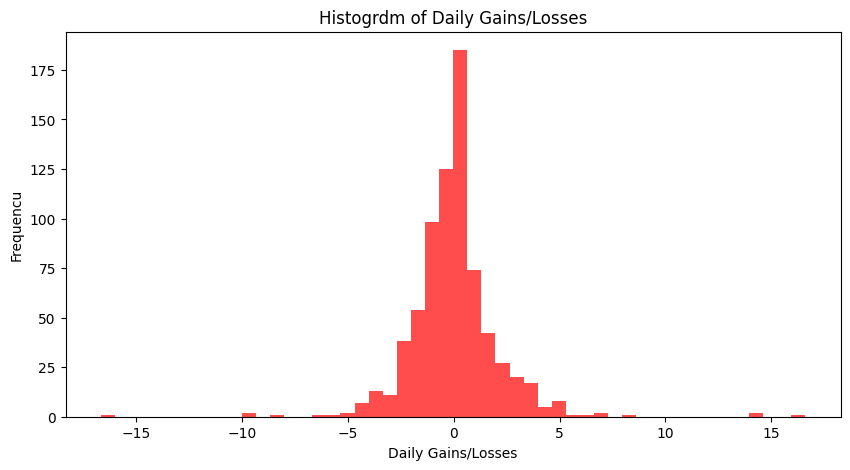

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Loaded
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# daily change in closing prices
df['close_change'] = df['close'].diff()
# Histogram for Daily Closing Price
plt.figure(figsize=(10, 5))
plt.hist(df['close'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Closing Price')
plt.ylabel('Frequncy')
plt.title('Histogram of Daily Closing Prices')
plt.show()

# Histogram for Daily Gains/Losses
plt.figure(figsize=(10, 5))
plt.hist(df['close_change'].dropna(), bins=50, color='red', alpha=0.7)  # dropna() to remove NaN values
plt.xlabel('Daily Gains/Losses')
plt.ylabel('Frequencu')
plt.title('Histogrdm of Daily Gains/Losses')
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

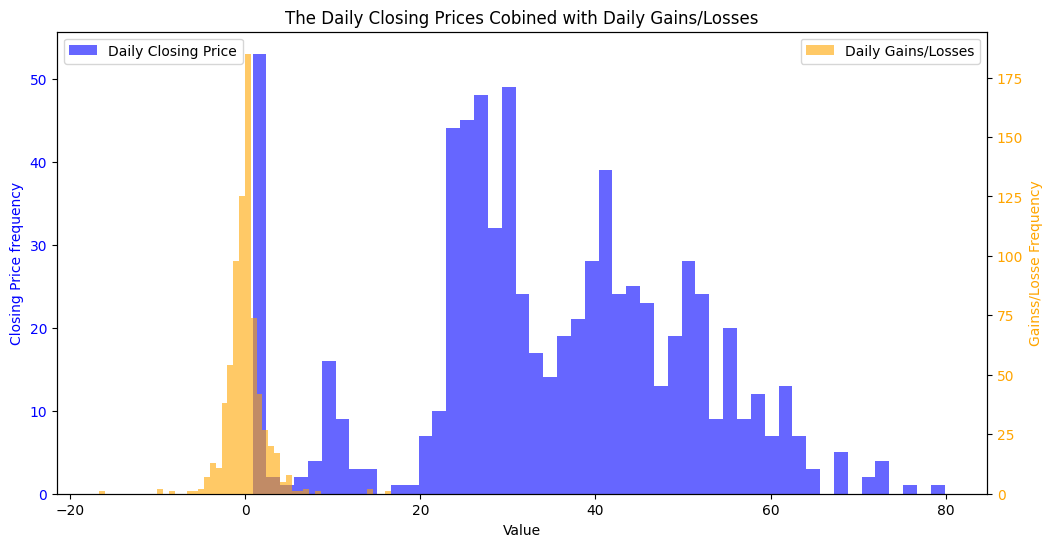

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Loaded
df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep=";")

# daily change in closing prices
df['close_change'] = df['close'].diff()

# figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))
# First plot (Daily Closing Price) on the first Y-axis
ax1.hist(df['close'], bins=50, color='blue', alpha=0.6, label='Daily Closing Price')
ax1.set_xlabel('Value')
ax1.set_ylabel('Closing Price frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second plot (Daily Gains/Lossess) on the second Y-axis
ax2 = ax1.twinx()  # instantiate second axes that uses the same x-axis
ax2.hist(df['close_change'].dropna(), bins=50, color='orange', alpha=0.6, label='Daily Gains/Losses')
ax2.set_ylabel('Gainss/Losse Frequency', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend made
plt.title('The Daily Closing Prices Cobined with Daily Gains/Losses')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Showed the plot
plt.show()

In [ ]:
# HARDEST ASSIGNMENT OF ALL YEAR BY FARRR(Had to go to TA office hrs), definetly should have gotten a group, the separator thing(;) was super critical